In [9]:
import librosa
import soundfile as sf
import numpy as np


# Assurez-vous de continuer pour chaque piste que vous voulez fusionner.


In [37]:
bass, sr = librosa.load('./bass.wav')
drums, _ = librosa.load('./drums.wav')
other, _ = librosa.load('./other.wav')
vocals, _ = librosa.load('./vocals.wav')
other , _ = librosa.load('./other.wav')
mixture, _ = librosa.load('./mixture.wav')

# Continuez pour chaque piste que vous souhaitez fusionner.
combined_audio = np.vstack((bass, drums, other, vocals))
sf.write('pistes_fusionnees.wav', combined_audio.T, sr)


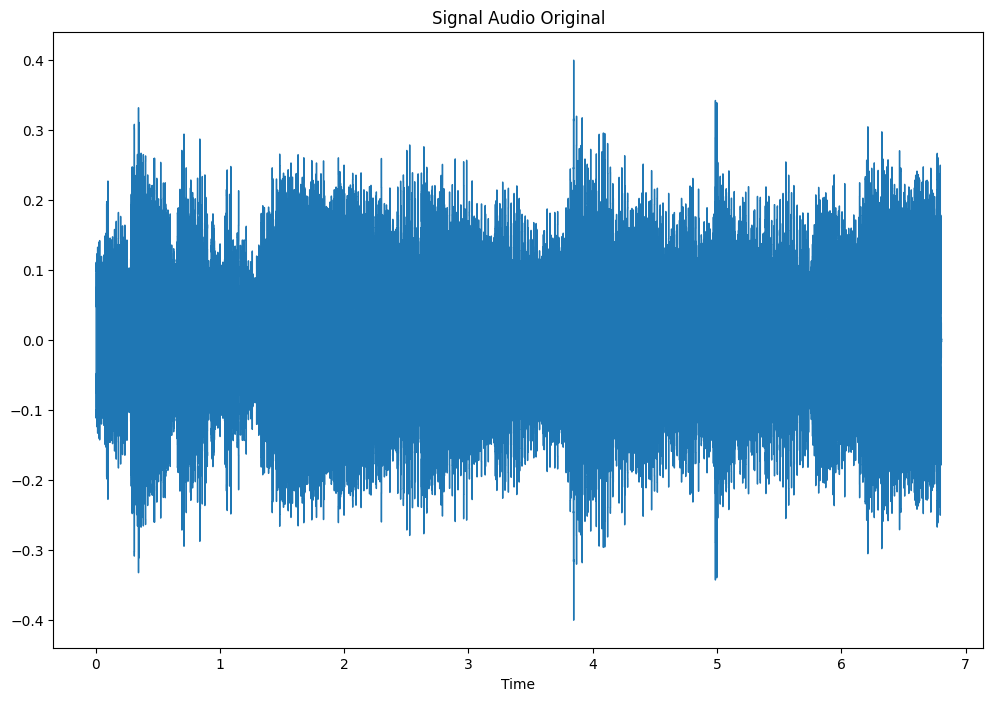

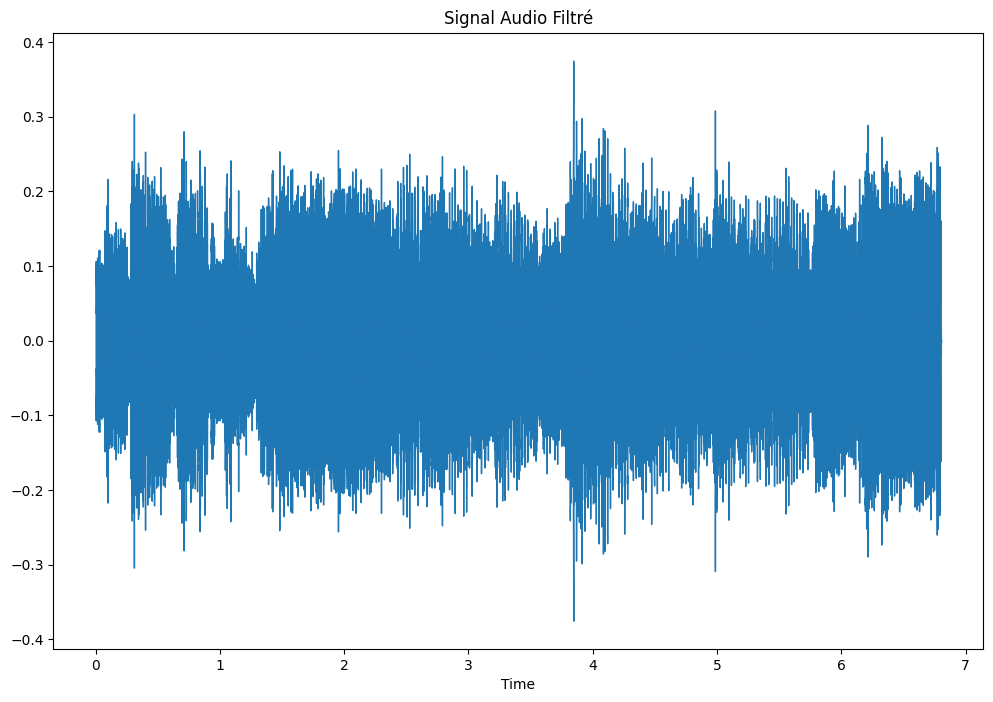

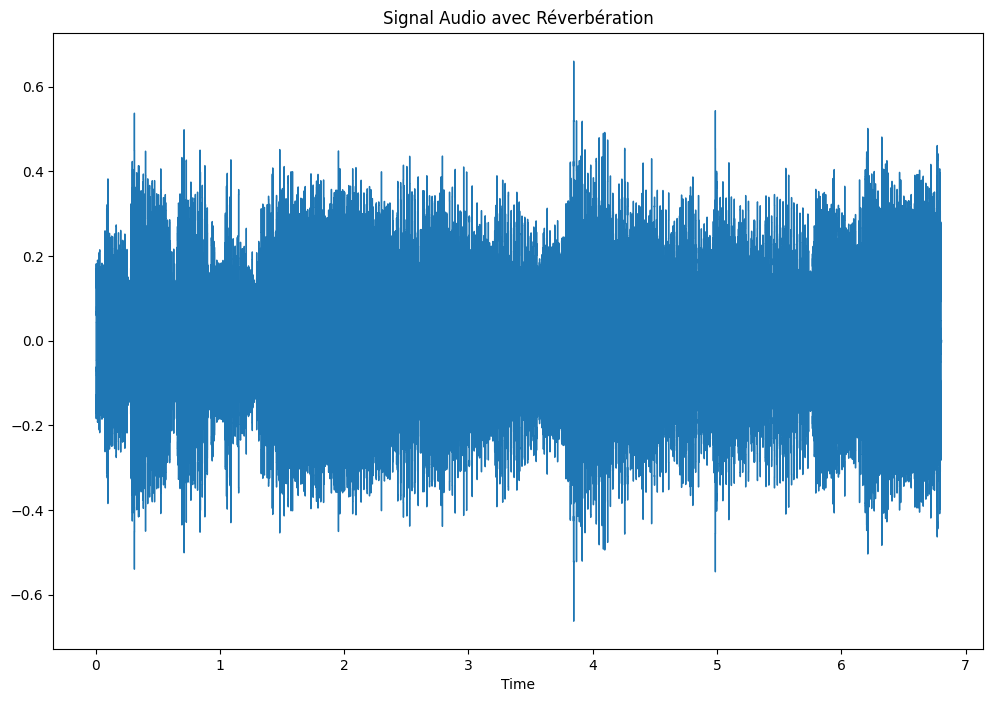

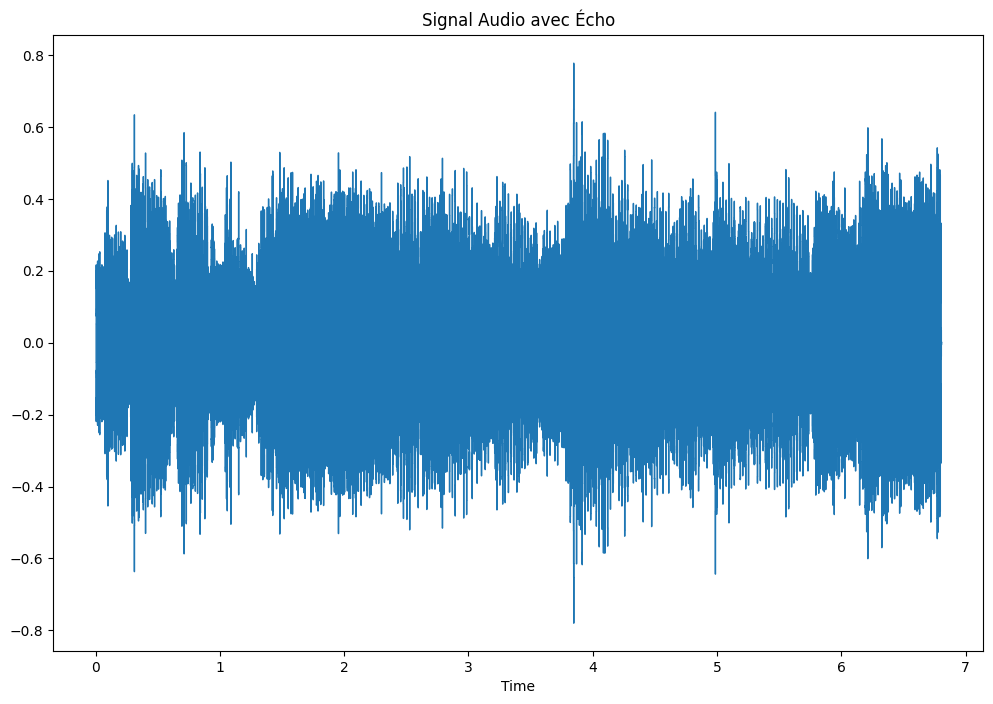

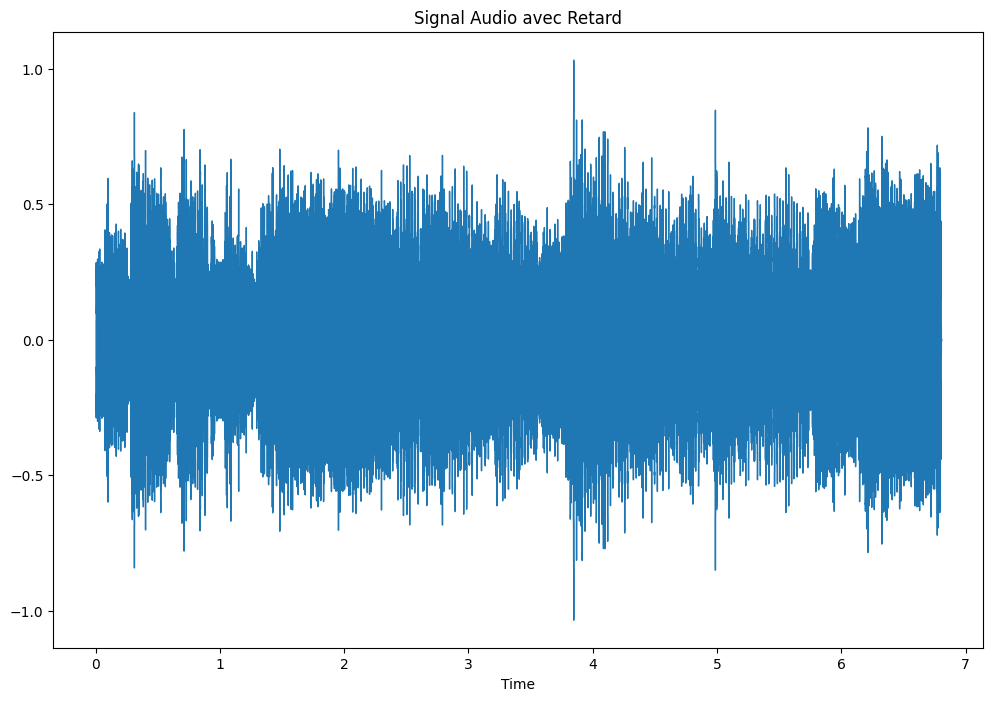

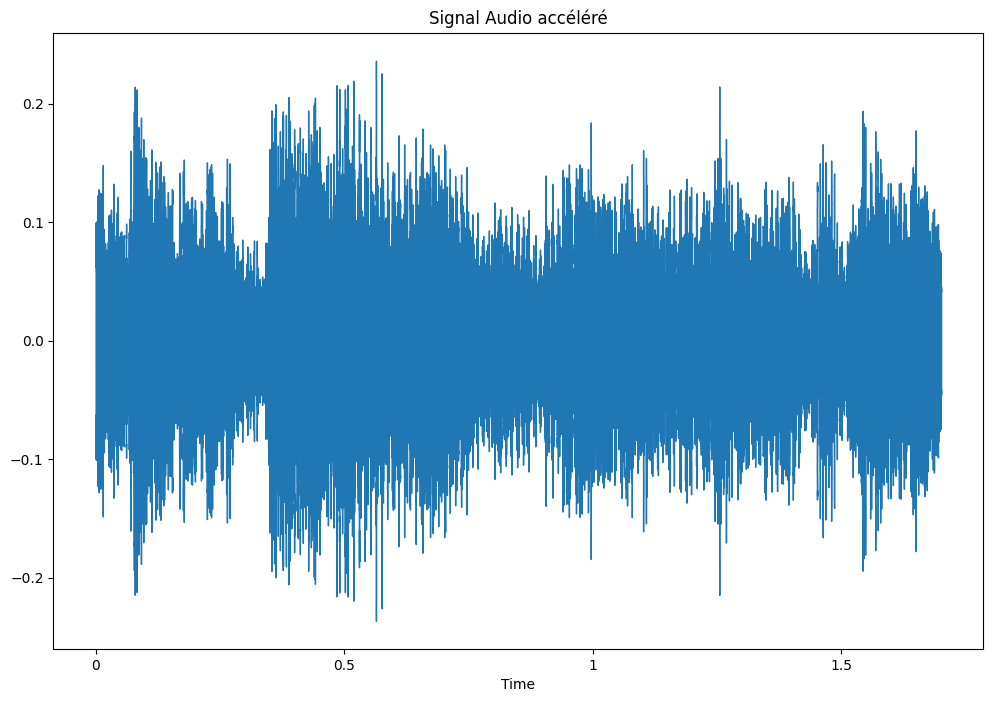

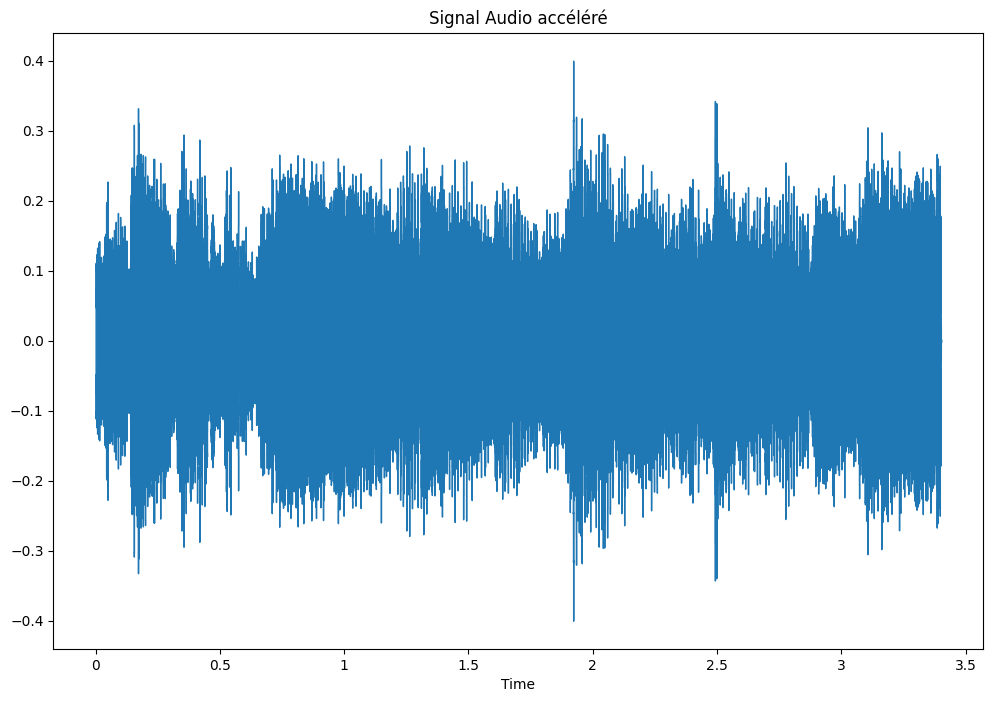

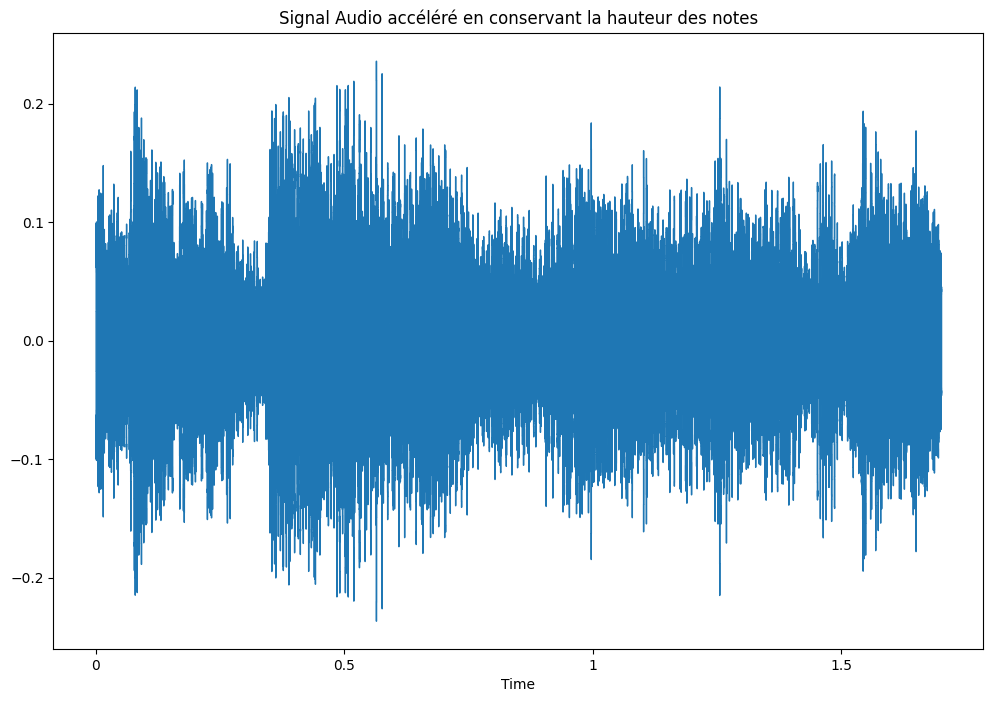

In [39]:

import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

# Charger un fichier audio
audio_path = 'pistes_fusionnees.wav'
y, sr = librosa.load(audio_path)

# Appliquer un filtre passe-bas
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

cutoff_frequency = 2000  # Fréquence de coupure en Hz
filtered_audio = butter_lowpass_filter(y, cutoff_frequency, sr)

# Ajouter de la réverbération, de l'écho ou du retard (exemples)
from scipy.signal import convolve

reverb = np.array([0.2, 0.4, 0.6, 0.4, 0.2])  # Noyau de réverbération intense
echo = np.array([1.0, 0.7, 0.4])  # Noyau d'écho prononcé
delay = np.array([1.0, 0.8, 0.6, 0.4])  # Noyau de retard prolongé


# Appliquer les effets
reverb_audio = convolve(filtered_audio, reverb, mode='full')
echo_audio = convolve(filtered_audio, echo, mode='full')
delay_audio = convolve(filtered_audio, delay, mode='full')
accelerated_audio = librosa.effects.time_stretch(y, rate = 2)

# Visualisation du signal audio
plt.figure(figsize=(12, 8))
librosa.display.waveshow(y, sr=sr)
plt.title('Signal Audio Original')
plt.show()

plt.figure(figsize=(12, 8))
librosa.display.waveshow(filtered_audio, sr=sr)
plt.title('Signal Audio Filtré')
plt.show()

plt.figure(figsize=(12, 8))
librosa.display.waveshow(reverb_audio, sr=sr)
plt.title('Signal Audio avec Réverbération')
plt.show()

plt.figure(figsize=(12, 8))
librosa.display.waveshow(echo_audio, sr=sr)
plt.title('Signal Audio avec Écho')
plt.show()

plt.figure(figsize=(12, 8))
librosa.display.waveshow(delay_audio, sr=sr)
plt.title('Signal Audio avec Retard')
plt.show()


plt.figure(figsize=(12, 8))
librosa.display.waveshow(accelerated_audio, sr=2*sr)
plt.title('Signal Audio accéléré')
plt.show()

plt.figure(figsize=(12, 8))
librosa.display.waveshow(accelerated_audio, sr=sr)
plt.title('Signal Audio accéléré en conservant la hauteur des notes')
plt.show()

Audio(y, rate=sr)


In [30]:
Audio(reverb_audio, rate=sr)

In [31]:
Audio(echo_audio, rate=sr)

In [26]:
Audio(delay_audio, rate=sr)

In [41]:
Audio(y, rate = 2*sr)

In [40]:
Audio(accelerated_audio, rate = sr)